# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [3]:
# Install Seaborn library, a powerful data visualization tool based on Matplotlib
# It simplifies the creation of beautiful and informative statistical graphics
!pip install seaborn

# Install Plotly library, a graphing library that enables interactive and high-quality visualizations
# It is particularly useful for web-based visualizations and dashboards
!pip install plotly

# Upgrade or install Kaleido, a library required for exporting Plotly charts to static image formats
# This allows you to save your Plotly visualizations as images (e.g., PNG, JPEG, etc.)
!pip install -U kaleido

In [5]:
# Importing the Pandas library for data manipulation and analysis
# It provides data structures like DataFrames to handle and analyze structured data
import pandas as pd

# Importing Matplotlib's pyplot module for creating static, animated, and interactive visualizations
# Commonly used for basic plotting functions (e.g., line plots, bar charts)
import matplotlib.pyplot as plt

# Importing Seaborn, which is built on top of Matplotlib, for creating statistical graphics
# It simplifies creating visually appealing and informative plots with less code
import seaborn as sns

# Importing Matplotlib's ticker module for controlling tick placement and formatting
# It allows you to customize axis ticks (e.g., frequency, formatting)
import matplotlib.ticker as ticker

# Importing Plotly Express, a high-level interface to Plotly for creating interactive visualizations quickly
# Plotly Express simplifies the process of building interactive charts with minimal code
import plotly.express as px

In [7]:
# Read the CSV file into a Pandas DataFrame
# The file 'WHO_COVID19_cases.csv' contains COVID-19 case data, assumed to be stored in the './data/' directory
# The data is read into the 'df' variable as a structured DataFrame for analysis and visualization
df = pd.read_csv('./data/WHO_COVID19_cases.csv')

# Display the first few rows of the DataFrame to get an overview of the data
# df.head()

# Display the entire DataFrame 'df'
# This will output the entire dataset, depending on its size, allowing you to inspect the loaded data
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


In [9]:
# Filter the data to include only rows for 'India', 'Italy', and 'Germany'
# Using .loc[] ensures we avoid the SettingWithCopyWarning by working directly on the DataFrame slice
# .isin() checks whether the 'Country' column contains one of the specified countries
countries = df.loc[df['Country'].isin(['India', 'Italy', 'Germany'])]

# Convert the 'Date_reported' column to datetime format for better handling and plotting of dates
# Using .loc[:, 'Date_reported'] ensures we are safely modifying the entire 'Date_reported' column
countries.loc[:, 'Date_reported'] = pd.to_datetime(countries['Date_reported'])

# Display the filtered data to verify that only the selected countries and formatted dates are present
countries

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
19032,2020-01-05 00:00:00,DE,Germany,Europe,EURO,1.0,1,3.0,3
19033,2020-01-12 00:00:00,DE,Germany,Europe,EURO,NaN,1,NaN,3
19034,2020-01-19 00:00:00,DE,Germany,Europe,EURO,NaN,1,NaN,3
19035,2020-01-26 00:00:00,DE,Germany,Europe,EURO,1.0,2,3.0,6
19036,2020-02-02 00:00:00,DE,Germany,Europe,EURO,9.0,11,3.0,9
...,...,...,...,...,...,...,...,...,...
26835,2024-08-04 00:00:00,IT,Italy,Europe,EURO,17341.0,26792873,64.0,197411
26836,2024-08-11 00:00:00,IT,Italy,Europe,EURO,16706.0,26809579,75.0,197486
26837,2024-08-18 00:00:00,IT,Italy,Europe,EURO,12578.0,26822157,49.0,197535
26838,2024-08-25 00:00:00,IT,Italy,Europe,EURO,4329.0,26826486,7.0,197542


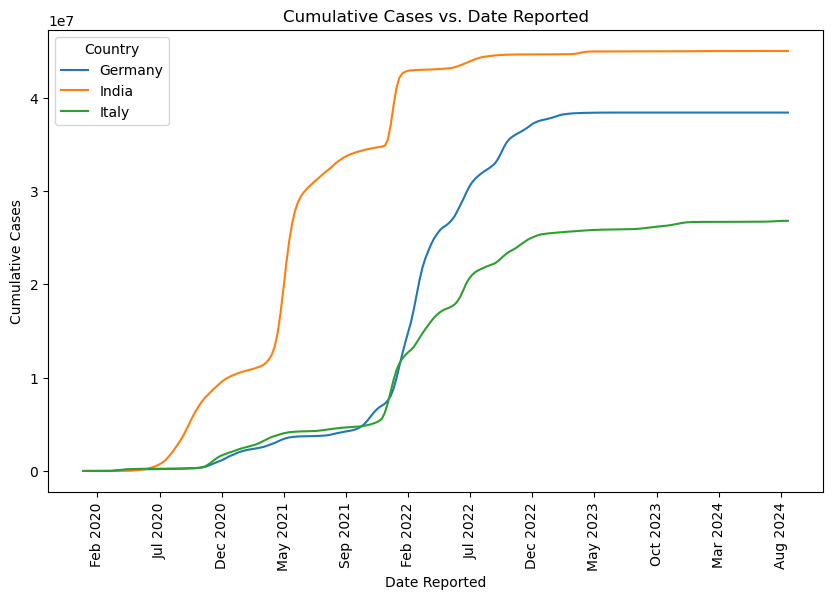

In [11]:
# Set the size of the plot, specifying a width of 10 inches and a height of 6 inches
# This adjusts the overall layout to ensure the plot is easy to read and properly scaled
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn to visualize the trend of 'Cumulative_cases' over time ('Date_reported')
# The 'hue' parameter assigns different colors to each country, helping distinguish their respective lines
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=countries, hue='Country')\
    .set(title='Cumulative Cases vs. Date Reported')  # Set the title of the plot

# Rotate the x-axis labels by 90 degrees for better readability
# This is especially useful when dealing with many date labels that can overlap
plt.xticks(rotation=90)

# Limit the number of x-axis ticks to a maximum of 15 using MaxNLocator
# This reduces the number of date labels shown, preventing overcrowding and making the plot clearer
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(15))

# Format the x-axis labels to show only the abbreviated month and year (e.g., 'Jan 2022')
# This makes the date display more compact and easier to interpret
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

# Add labels to the x-axis and y-axis for clarity
# 'Date Reported' on the x-axis and 'Cumulative Cases' on the y-axis
plt.xlabel('Date Reported')
plt.ylabel('Cumulative Cases')

# Display the resulting plot on the screen
plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [27]:
# Importing Plotly Express, a high-level interface for creating interactive visualizations
# Plotly Express simplifies the process of creating various types of plots with minimal code
import plotly.express as px

# Importing Plotly's I/O module for managing input and output configurations for Plotly figures
# This module allows customization of how figures are displayed or saved
import plotly.io as pio
 
# Set the default renderer for Plotly figures to 'notebook'
# This configuration is necessary for rendering interactive visualizations directly in Jupyter notebooks
pio.renderers.default = 'notebook'  # Options include 'notebook', 'browser', etc.

In [29]:
# Create a line plot using Plotly Express to visualize the relationship between cumulative cases and cumulative deaths
# The plot will display different lines for each country based on the color parameter
fig = px.line(
    countries,  # DataFrame containing the data for plotting
    x='Cumulative_cases',  # Set the x-axis to represent cumulative cases
    y='Cumulative_deaths',  # Set the y-axis to represent cumulative deaths
    #size='weight',  # This parameter can be used to size the points based on another variable
    color='Country',  # Differentiate lines by country using colors
    labels={  # Custom labels for the axes to improve readability
            'Cumulative_cases': 'Cumulative Cases',  # Rename the x-axis label
            'Cumulative_deaths': 'Cumulative Deaths'  # Rename the y-axis label
            },
    title="Cumulative Deaths vs Cumulative Cases"  # Title of the plot
    #color_discrete_map=color_map  # This parameter can specify a color map for the lines
)

# Display the figure in the notebook or save as an image depending on the renderer specified
#fig.show(renderer="png")  # Render the plot as a static PNG image

# Alternatively, you can display the plot in a web browser for an interactive experience
fig.show(renderer="browser")  # To view the plot in the browser instead of as a PNG
